# Part II - Factors that influence loan amount disbursed to borrowers
## by Fidelia Tubonibo




## Investigation Overview


> This presentation highlights the factors that influence the loan amount borrowers were able to access and the status of loans collected. It also explores the trend of loan collection across time.


## Dataset Overview

> This dataset contains loan and borrower data from 113,937 loans listings in the USA. There are 113,937 loan entries with 81 variables on each loan in this dataset. Most variables are numeric in nature, but other data types include: category, string, integer, float, boolean and datetime.
Two columns were extracted from the "listing creation date" column into separate columns named "Year" and "Quarter"

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

# change the following data types to datetime
loan_df[['ListingCreationDate', 'ClosedDate', 'FirstRecordedCreditLine', 'LoanOriginationDate']]=loan_df[['ListingCreationDate', 'ClosedDate', 'FirstRecordedCreditLine','LoanOriginationDate']].apply(pd.to_datetime)

# extract year from listing creation date into a separate column
loan_df['Year'] = loan_df['ListingCreationDate'].dt.year

# extract quarter from listing creation date into a separate column
loan_df['Quarter'] = loan_df['ListingCreationDate'].dt.quarter

#change the following data types to category
loan_df[['LoanStatus', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'LoanOriginationQuarter', 'IncomeRange','Quarter']]= loan_df[['LoanStatus','ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore','ListingCategory (numeric)', 'LoanOriginationQuarter', 'IncomeRange', 'Quarter']].apply(lambda x: x.astype('category'))

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Amount

The loan amount vary between 1,000 USD and 35,000 USD. The loan amount with the highest borrower count is 4,000 USD. Across the loan amounts, fewer borrowers request a high loan amount. 

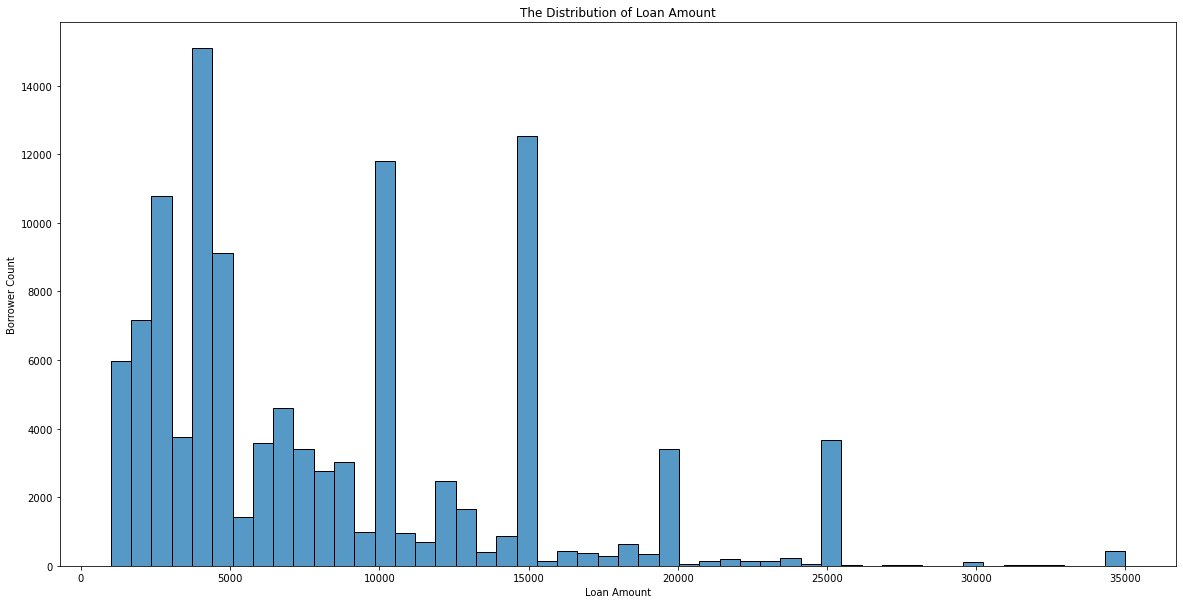

In [5]:
#setting figure size
plt.figure(figsize = [20,10])

#histogram of loan amount
bins = np.arange(1000, loan_df['LoanOriginalAmount'].max()+ 680, 680)
sns.histplot(loan_df['LoanOriginalAmount'], bins = bins)

#setting plot labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Borrower Count')
plt.title('The Distribution of Loan Amount');

## Relationship between Loan amount and (a)Employment Status  (b) Income Range

### a) Loan amount and Employment Status 
Borrowers who are employed have access to high loan amounts while people who work part-time have access to the least loan amounts. 

### b) Loan amount and Income range
The income range of borrowers further gives insight to the amount of loans they have access to. High earning borrowers have access to loans of higher amounts as opposed to people who earn less. 


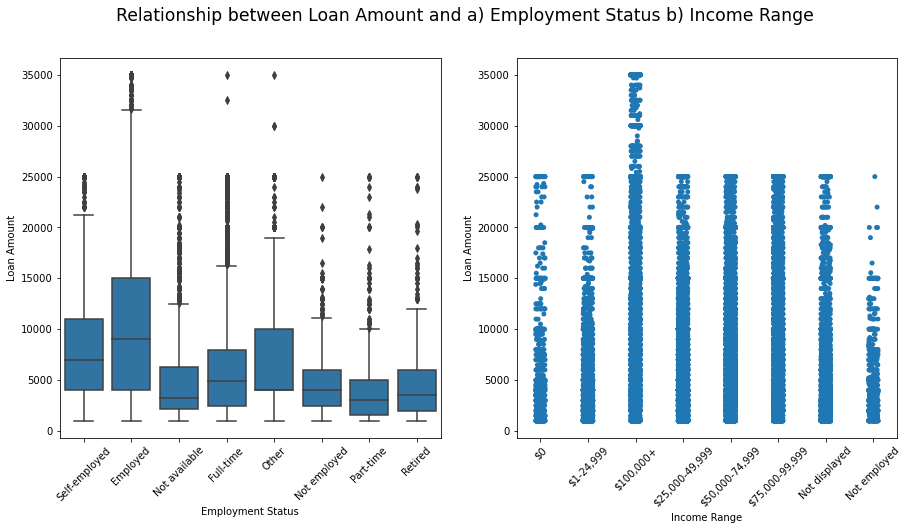

In [25]:
# define theme colour 
colour= sns.color_palette()[0]
plt.figure(figsize = [15, 7])

#left plot: box plot showing relationship between loan amount and employment status
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=loan_df, x='EmploymentStatus', y='LoanOriginalAmount', color=colour)
plt.xlabel('Employment Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation= 45)

#right plot: strip plot showing relationship between loan amount and income range
ax2 = plt.subplot(1,2,2)
sns.stripplot(data = loan_df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = colour)
plt.xlabel('Income Range')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)

plt. suptitle ('Relationship between Loan Amount and a) Employment Status b) Income Range', size = 'xx-large', weight = 'book');

## Relationship between Income range and borrower APR

Here we see how the income range of borrowers affect the annual principal rate on loans collected. Borrowers who are not employed are seen to have the highest APR while people who earn above 100k USD have the least. This implies that high earners are able to remit their annual interest better than low income earners.


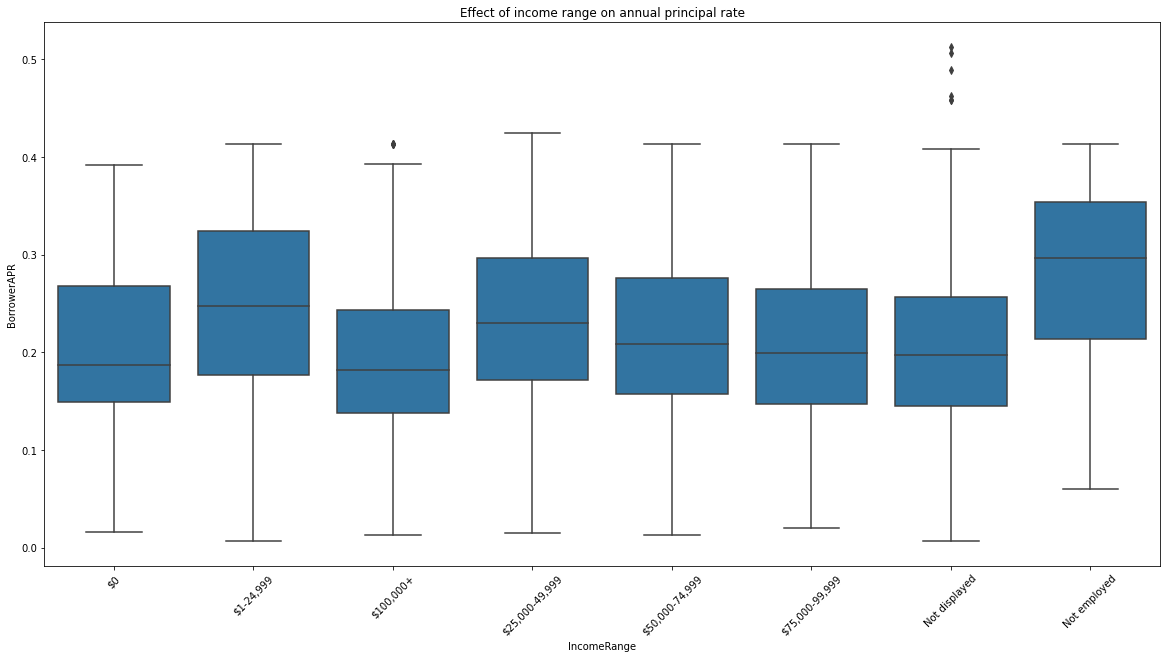

In [11]:
colour = sns.color_palette()[0]
plt.figure(figsize=[20,10])
sns.boxplot(data=loan_df, x='IncomeRange', y='BorrowerAPR', color=colour)
plt.xticks(rotation=45);

#setting plot labels and title
plt.xlabel('IncomeRange')
plt.ylabel('BorrowerAPR')
plt.title('Effect of income range on annual principal rate');

## How does loan amount change with every quarter in each year?
There is a relative increase in loan collection across quarters of each year until 2009. After which we see a steady increase from 2010.
Loan-seeking was at an all-time high in every quarter of 2013. A myriad of societal and economic factors could have played a role in this increase.

<Figure size 1440x720 with 0 Axes>

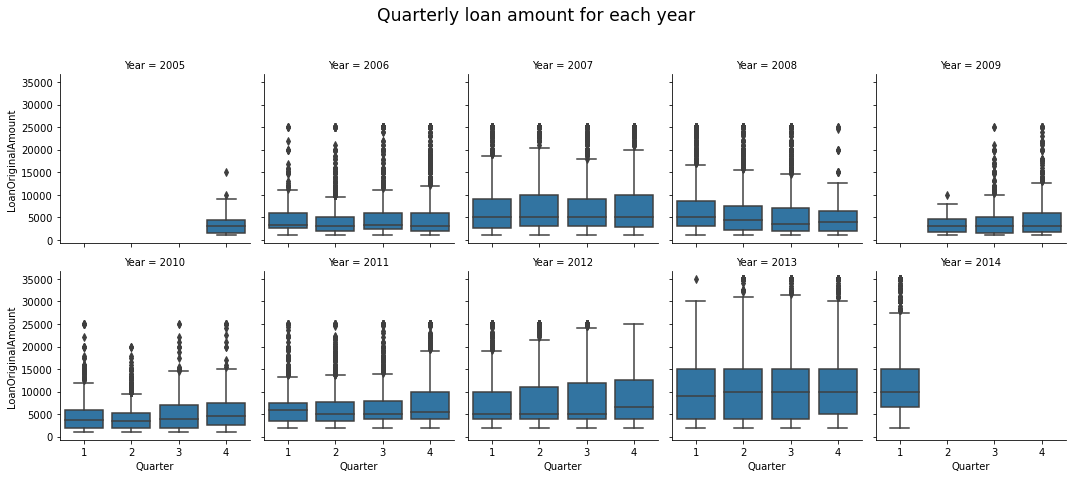

In [31]:
plt.figure(figsize = [20, 10])
g = sns.FacetGrid(data = loan_df, col = 'Year', col_wrap= 5)
g.map(sns.boxplot, 'Quarter', 'LoanOriginalAmount')

#setting plot labels and title
plt.xlabel('Quarter')
plt.ylabel('Loan Amount');
plt.suptitle('Quarterly loan amount for each year', size = 'xx-large', weight ='book', y= 1.1);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
jupyter nbconvert Part_II_Loan_Data.ipynb --to slides --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 